# Linear Regression
Linear regression is one of the best-known methods of prediction and analysis of continuous variables. In the model there is a X number of predictor variables and a variable to predict, his formula is
# $$ Y_i = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... + \beta_nX_n$$
* $Y_i$: is the variable that we want to predict 
* $\beta$: the constant or intercept, is a constant number in the prediction, you can create a linera regression function without this parameter
* $X$: each feature
* $\beta_n$: the weigths that multiply the features

This method consists of fitting a straight line to the data that can predict those data with the least possible error. This means that the distance from the points to the line is the minimum possible.

Linear Regression belongs to the supervised machine learning methods, so it is for continuos data.
![linear regression image](https://miro.medium.com/max/1200/1*LEmBCYAttxS6uI6rEyPLMQ.png)
This read line is the line that best fit to all the points and have the minimun error for all the points

## Scikit Learn Linear Regression
Now we are going to use the linear regression of sklearn no predict data and see all the posibilities that this package offer to us

### 1. Import librarys

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%load_ext version_information
%matplotlib inline
%version_information pandas, matplotlib, sklearn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 5.0.0 29 generic x86_64 with debian buster sid
pandas 0.25.1
matplotlib 3.1.1
sklearn 0.21.2
Sat Sep 28 13:54:02 2019 CEST

### 2. Dataset
This is a dataset about the investment in diferent communication media and the sales of each store that we have in different cities, The communication media investmen is a calculation of the money that each shop contribute to the communitacion media budget. 

* The rows: each row is a shop
* TV: investment in TV in euros
* Radio: investmen in radio in  euros
* Newspaper: investment in newspapes in euros
* Sales: the money earned in each store in one month
* City size: if the city have a population bigger than 500.000 is big if not is small

You can find this dataset [here](https://www.kaggle.com/fayomi/advertising) and download the original dataset, but I've made some modifications, so you have to download from my github account [here]()

In [13]:
df_ad = pd.read_csv('data/Advertising.csv')
df_ad.drop(columns='Unnamed: 0', inplace=True)
df_ad['Sales'] = df_ad['Sales'] * 100
df_ad

,TV,Radio,Newspaper,Sales,City_size
0,230.1,37.8,69.2,2210.0,big
1,44.5,39.3,45.1,1040.0,small
2,17.2,45.9,69.3,930.0,small
3,151.5,41.3,58.5,1850.0,big
4,180.8,10.8,58.4,1290.0,small
...,...,...,...,...,...
195,38.2,3.7,13.8,760.0,small
196,94.2,4.9,8.1,970.0,small
197,177.0,9.3,6.4,1280.0,small
198,283.6,42.0,66.2,2550.0,big


### 3 Prepare the data to the model

In [14]:
train, test = train_test_split(df_ad)
X_train = train.drop(columns=['Sales', 'City_size'])
y_train = train['Sales']
X_test = test.drop(columns=['Sales', 'City_size'])
y_test = test['Sales']

### 4. Train the model and test it
First of all we are going to see the hyperparameters that Linear regressiona have

* fit_intercept: True or False if you want a constant $\beta$
* normalize: if you want to normalize the data before train

In [15]:
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(X_train, y_train)
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)
print("Mean absolute error in train: ", mean_absolute_error(predictions_train, y_train))
print("Root of mean square error in train: ", np.sqrt(mean_squared_error(predictions_train, y_train)))
print("Mean absolute error in test: ", mean_absolute_error(predictions_test, y_test))
print("Root of mean square error in test: ", np.sqrt(mean_squared_error(predictions_test, y_test)))
print("R2 in train: ", r2_score(predictions_train, y_train))
print("R2 in test: ", r2_score(predictions_test, y_test))
print("Min sales: ", np.min(df_ad['Sales']))
print("Max sales: ", np.max(df_ad['Sales']))

Mean absolute error in train:  128.21029897094616
Root of mean square error in train:  171.33757670207248
Mean absolute error in test:  123.62715721572802
Root of mean square error in test:  155.77727445907922
R2 in train:  0.8801657130921301
R2 in test:  0.900788975289897
Min sales:  160.0
Max sales:  2700.0


* We have a mean absolute error of 135 € per store in test, wich is not good but we can work with him.  
* Our root mean squared error is higher which means that some data suffers a big error
* Our R2 says that we can explain the 87% of the sells with this model and this variables, i don't like to much this metric, and is not very recommendable to use it

### 5. Interprete the model

In [5]:
pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])

,Coefficient
TV,4.604620
Radio,18.615614
Newspaper,0.087046


From the below result we can make the following interpretation
1. For each euro that i invest in TV, my earns will increase in 4,6 euros
2. For each euro that i invest in Radio, my earns will increase in 18,61 euros
3. For each euro that i invest in Newspaper, my earns will increse in 0.08 euros.

Sometimes the coeffiecients of the variables could be negative, This is for the Intercept, if we set the intercept to false, the coefficients variables that were negative will be positive with a very low increase.

In [7]:
lm.intercept_

278.78890111844134

The intercept tell us which is the minimun that i will earn, for example if my invest are zero in all communications media, my earns will be 290

In [23]:
preds = pd.DataFrame({'real_values':y_test, 'predictions':predictions_test})
preds

,real_values,predictions
52,2260.0,2054.946754
114,1460.0,1513.084006
69,2230.0,2096.663577
188,1590.0,1854.789245
74,1700.0,1720.499162
154,1560.0,1537.152881
117,940.0,646.762626
133,1960.0,1918.433181
84,2170.0,2065.288786
142,2010.0,1915.444996


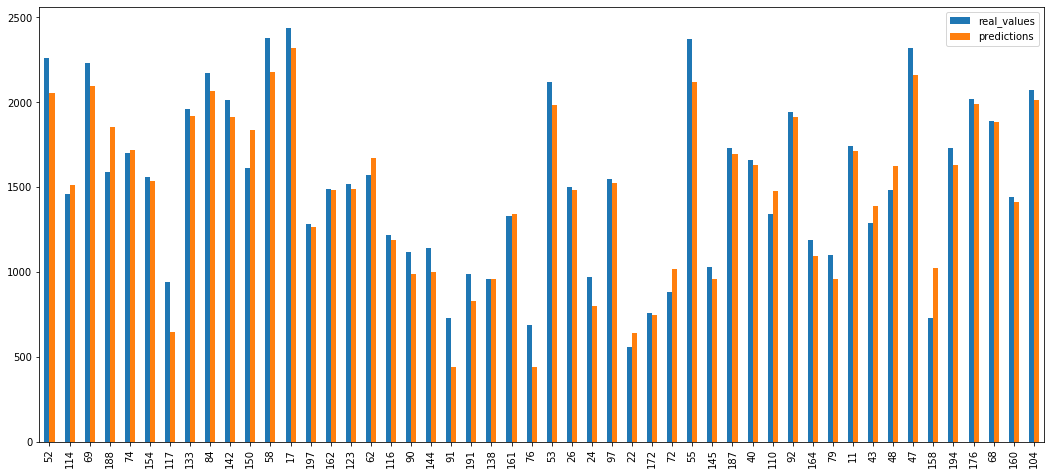

In [54]:
preds.plot(kind='bar',figsize=(18,8))
plt.grid(linewidth='2')
plt.grid(linewidth='2')
plt.grid(None)
plt.show()